In [1]:
import pandas as pd

train_df = pd.read_csv('train.tsv', sep='\t')
val_df = pd.read_csv('val.tsv', sep='\t')

val_df_isot = pd.read_csv('../D1/val.tsv', sep='\t')
val_df_fnd = pd.read_csv('../D3/val.tsv', sep='\t')
val_df_fnn = pd.read_csv('../D4/val.tsv', sep='\t')
val_df_covid = pd.read_csv('../D5/val.tsv', sep='\t')

In [2]:
# no null values in dataset
train_df['statement'].isnull().sum()

0

In [3]:
val_df['statement'].isnull().sum()

0

In [4]:
print('Train real news:', train_df[train_df['label']==1].shape[0])
print('Train fake news:', train_df[train_df['label']==0].shape[0])

print('Val real news:', val_df[val_df['label']==1].shape[0])
print('Val fake news:', val_df[val_df['label']==0].shape[0])

Train real news: 3638
Train fake news: 2834
Val real news: 869
Val fake news: 720


In [5]:
#sample real news
train_df[train_df['label']==1].sample(n=1)['statement'].iloc[0]

'Several elected state officials have opened their homes to children in need of loving families.'

In [6]:
#sample fake news
train_df[train_df['label']==0].sample(n=1)['statement'].iloc[0]

'Says Damascus disincorporation would produce NO significant tax savings.'

In [7]:
# word count in news
word_counts_train = train_df['statement'].apply(lambda x: len(x.split()))
word_counts_train.describe()

count    6472.000000
mean       17.715853
std        10.516843
min         2.000000
25%        12.000000
50%        16.000000
75%        22.000000
max       467.000000
Name: statement, dtype: float64

In [8]:
word_counts_val = val_df['statement'].apply(lambda x: len(x.split()))
word_counts_val.describe()

count    1589.000000
mean       17.699182
std         8.808064
min         2.000000
25%        12.000000
50%        16.000000
75%        22.000000
max       205.000000
Name: statement, dtype: float64

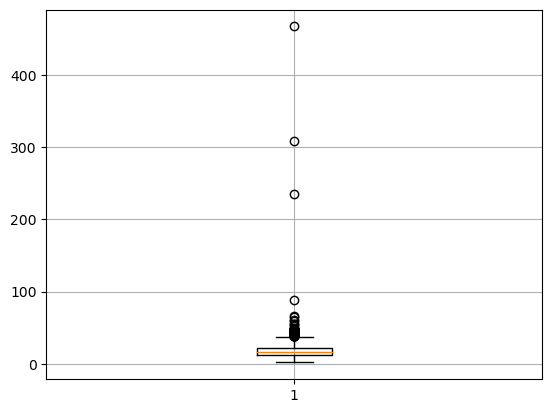

In [9]:
import matplotlib.pyplot as plt

plt.boxplot(word_counts_train)
plt.grid(True)
plt.show()

In [10]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
stop_words = stopwords.words('english')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()

In [12]:
def data_preprocessing(review):
    
    # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) # remove html tags
    review = re.sub('[^A-Za-z0-9]+', ' ', review) # taking only words
    
    # lowercase
    review = review.lower()
    
    # tokenization
    tokens = nltk.word_tokenize(review)
    
    # stop word removal
    review = [word for word in tokens if word not in stop_words]
    
    # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review

In [13]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
train_df['preprocessed_title'] = train_df['statement'].apply(lambda review: data_preprocessing(review))
train_df

,label,statement,preprocessed_title
0,0,I'm predicting (the Saints) will go not only u...,predicting saint go not undefeated way super b...
1,0,U.S. Senate Majority Leader Harry Reid on whet...,u senate majority leader harry reid whether se...
2,1,"Now remember, property taxes went up 70 percen...",remember property tax went 70 percent 10 year ...
3,1,"A gas tax holiday ""would at best provide 30 ce...",gas tax holiday would best provide 30 cent day...
4,1,"Says David Rivera received a $5,000 campaign c...",say david rivera received 5 000 campaign contr...
...,...,...,...
6467,1,The top 10 most well-paid CEOs in America rece...,top 10 well paid ceo america received combined...
6468,1,While 38 percent of (firearms) dealers that we...,38 percent firearm dealer inspected 2011 nonco...
6469,1,Says that in the recent year homeowners across...,say recent year homeowner across ohio signed m...
6470,1,We are coming up on our 40th anniversary of el...,coming 40th anniversary electing republican un...


In [15]:
val_df['preprocessed_title'] = val_df['statement'].apply(lambda review: data_preprocessing(review))
val_df

,label,statement,preprocessed_title
0,0,Common Core is being used by the Obama Adminis...,common core used obama administration turn dep...
1,0,"Bank of America could create 878,300 jobs with...",bank america could create 878 300 job benefit ...
2,1,Four out of 10 homicides are committed by gun ...,four 10 homicide committed gun city
3,1,The War in Afghanistan is officially the longe...,war afghanistan officially longest war america...
4,1,"Says, I-205, six miles of which runs through m...",say 205 six mile run district already carry tr...
...,...,...,...
1584,1,On the day of the New Hampshire primary in 198...,day new hampshire primary 1980 top 13 people r...
1585,0,We've excluded lobbyists from policymaking jobs.,excluded lobbyist policymaking job
1586,1,"Obama has ""visited more countries and met with...",obama visited country met world leader preside...
1587,0,Says the claims that Texas faces a $27 billion...,say claim texas face 27 billion shortfall flat...


In [16]:
val_df_isot['preprocessed_title'] = val_df_isot['title'].apply(lambda review: data_preprocessing(review))
val_df_fnd['preprocessed_title'] = val_df_fnd['title'].apply(lambda review: data_preprocessing(review))
val_df_fnn['preprocessed_title'] = val_df_fnn['title'].apply(lambda review: data_preprocessing(review))
val_df_covid['preprocessed_title'] = val_df_covid['title'].apply(lambda review: data_preprocessing(review))

print('ISOT length:', len(val_df_isot))
print('LIAR length:', len(val_df))
print('FakeNewsDataset length:', len(val_df_fnd))
print('FakeNewsNet length:', len(val_df_fnn))
print('Covid-19 length:', len(val_df_covid))

ISOT length: 8980
LIAR length: 1589
FakeNewsDataset length: 4048
FakeNewsNet length: 4639
Covid-19 length: 624


In [17]:
X_val_isot = val_df_isot['preprocessed_title']
y_val_isot = val_df_isot['true']

X_val_fnd = val_df_fnd['preprocessed_title']
y_val_fnd = val_df_fnd['true']

X_val_fnn = val_df_fnn['preprocessed_title']
y_val_fnn = val_df_fnn['true']

X_val_covid = val_df_covid['preprocessed_title']
y_val_covid = val_df_covid['true']

In [18]:
X_train = train_df['preprocessed_title']
X_val = val_df['preprocessed_title']

y_train = train_df['label']
y_val = val_df['label']

print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_val.shape, y_val.shape)

Train data: (6472,) (6472,)
Test data: (1589,) (1589,)


In [19]:
# vectorizing text data: TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_news_tfidf = vectorizer.fit_transform(X_train)
X_val_news_tfidf = vectorizer.transform(X_val)

print('X_train_new_tfidf shape:', X_train_news_tfidf.shape)
print('X_test_news_tfidf shape:', X_val_news_tfidf.shape)

X_train_new_tfidf shape: (6472, 1262)
X_test_news_tfidf shape: (1589, 1262)


In [20]:
X_val_isot_tfidf = vectorizer.transform(X_val_isot)
X_val_fnd_tfidf = vectorizer.transform(X_val_fnd)
X_val_fnn_tfidf = vectorizer.transform(X_val_fnn)
X_val_covid_tfidf = vectorizer.transform(X_val_covid)

In [21]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clf = MultinomialNB(alpha=1)
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val, y_pred))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.5594059405940593
LIAR: 0.7043568464730291
FakeNewsDataset: 0.5080142475512022
FakeNewsNet: 0.7208844464637286
Covid-19: 0.608695652173913


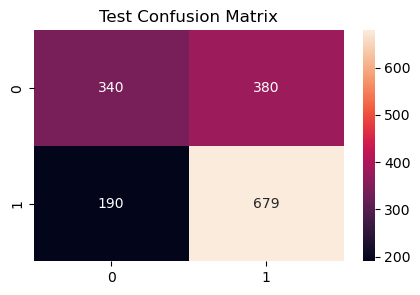

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val, y_pred))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.3885012559307843
LIAR: 0.6821120689655172
FakeNewsDataset: 0.365211810012837
FakeNewsNet: 0.3912671232876712
Covid-19: 0.3931034482758621


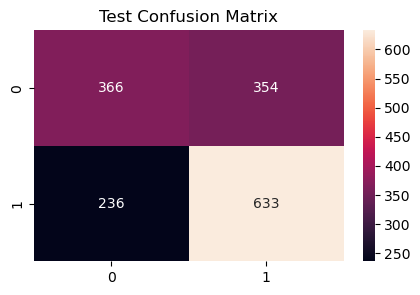

In [24]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [25]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val, y_pred))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.6256196190973128
LIAR: 0.7096774193548386
FakeNewsDataset: 0.5916635927701955
FakeNewsNet: 0.8430606327996973
Covid-19: 0.7479674796747967


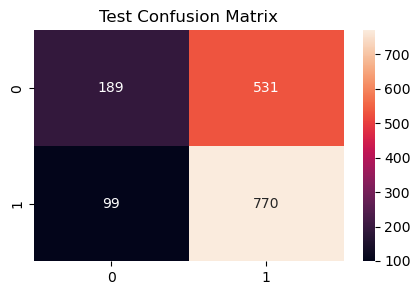

In [26]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [28]:
clf.estimator_errors_

array([0.43788628, 0.47761334, 0.4868128 , 0.49158823, 0.49169265,
       0.49188553, 0.49258117, 0.49331453, 0.49298564, 0.49289296,
       0.49208313, 0.49528397, 0.49183372, 0.48360337, 0.49416581,
       0.49051087, 0.49450391, 0.49450205, 0.49432223, 0.49714861,
       0.49772198, 0.49375845, 0.49065011, 0.49662741, 0.4955507 ,
       0.49527251, 0.4947423 , 0.49512768, 0.4919662 , 0.4973675 ,
       0.49716313, 0.49708399, 0.49647012, 0.4957649 , 0.49720951,
       0.49654241, 0.49464822, 0.49773825, 0.49565016, 0.49408311,
       0.49701997, 0.49759209, 0.49587186, 0.49770513, 0.49741453,
       0.49799815, 0.49437268, 0.49789624, 0.49580472, 0.4968217 ])

In [29]:
clf.estimators_[0].n_features_in_

1262

In [30]:
vectorizer.vocabulary_

{'go': 512,
 'not': 796,
 'way': 1223,
 'super': 1110,
 'something': 1075,
 'never': 785,
 'done': 362,
 'senate': 1034,
 'majority': 713,
 'leader': 663,
 'harry': 543,
 'reid': 961,
 'whether': 1234,
 'democrat': 343,
 'would': 1252,
 'seat': 1024,
 'property': 908,
 'tax': 1130,
 'went': 1231,
 '70': 58,
 'percent': 855,
 '10': 1,
 'year': 1255,
 'became': 162,
 'governor': 521,
 'gas': 497,
 'best': 171,
 'provide': 914,
 '30': 38,
 'cent': 228,
 'day': 330,
 'three': 1155,
 'month': 763,
 'total': 1165,
 '28': 36,
 'say': 1017,
 'david': 329,
 'received': 944,
 '000': 0,
 'campaign': 208,
 'contribution': 290,
 'congressman': 281,
 'currently': 323,
 'house': 569,
 'ethic': 415,
 'investigation': 607,
 'opposes': 820,
 'virginia': 1205,
 'right': 989,
 'work': 1244,
 'law': 657,
 '90': 64,
 'statistic': 1093,
 'background': 150,
 'check': 239,
 'thats': 1145,
 'health': 548,
 'care': 219,
 'number': 801,
 'uninsured': 1190,
 'america': 116,
 'much': 769,
 'money': 762,
 'trillion'

In [32]:
import numpy as np

top_words = []

for i in range(50):
    for term, idx in vectorizer.vocabulary_.items():
        if idx == np.where(clf.estimators_[i].feature_importances_ == 1)[0][0]:
            top_words.append(term)

In [33]:
def words_in_string(word_list, a_string):
    return set(word_list).intersection(a_string.split())

In [34]:
matches = 0
for sentence in X_val_fnn:
    if len(words_in_string(top_words, sentence)) > 0:
        matches += 1
        
print(matches)

655


In [35]:
matches = 0
for sentence in X_val_covid:
    if len(words_in_string(top_words, sentence)) > 0:
        matches += 1
        
print(matches)

78


In [36]:
for word in top_words:
    print(word)

percent
obama
since
obamas
georgia
walker
rep
highest
average
obamacare
half
still
day
year
medicare
government
romney
mccain
million
nothing
face
debt
country
even
le
nearly
actually
plan
wisconsin
group
debate
whether
muslim
percent
well
time
spending
third
month
american
check
rank
stimulus
became
least
minute
clinton
line
almost
white


In [27]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val, y_pred))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.6313971742543171
LIAR: 0.6916703009158308
FakeNewsDataset: 0.6220003839508543
FakeNewsNet: 0.7834516657564172
Covid-19: 0.7039473684210527


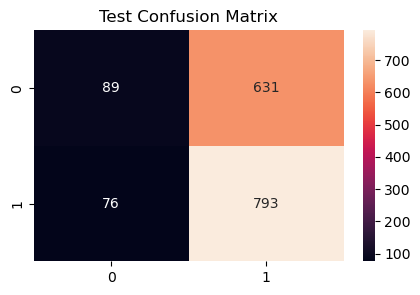

In [28]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [30]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_news_tfidf, y_train)

y_pred = xgb_model.predict(X_val_news_tfidf)
y_pred_isot = xgb_model.predict(X_val_isot_tfidf)
y_pred_fnd = xgb_model.predict(X_val_fnd_tfidf)
y_pred_fnn = xgb_model.predict(X_val_fnn_tfidf)
y_pred_covid = xgb_model.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val, y_pred))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.5432518597236982
LIAR: 0.6900464156781846
FakeNewsDataset: 0.5540106951871657
FakeNewsNet: 0.7877516778523489
Covid-19: 0.6439854191980559


In [33]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val, y_pred))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.5350730456116873
LIAR: 0.7027310924369748
FakeNewsDataset: 0.46264225630875805
FakeNewsNet: 0.5904292751583392
Covid-19: 0.48558421851289835
